In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.listdir()

['Untitled.ipynb',
 'Spam_Ham_Modelling.ipynb',
 'spam.csv',
 '.ipynb_checkpoints']

In [3]:
#import metrics
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,classification_report,accuracy_score

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [7]:
import wordcloud
import nltk

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [9]:
#import the dataset
data=pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [11]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [12]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Making some Important Function
#Such plotting the confusion matrix and the printing of the certain metrics such accuaracy_score and the classification Report

In [14]:
def print_metrics(y_test,y_pred):
    acc_sc=accuracy_score(y_test,y_pred)
    print("Accuracy Score\n")
    print(acc_sc)
    print("The Classification Report")
    print(classification_report(y_test,y_pred))
    return acc_sc

In [15]:
#Plotting the confusion matrix is very nice visualization measure

In [143]:
def plotting_confusion_matrix(y_test,y_pred):
    cm=confusion_matrix(y_test,y_pred)
    ax=sns.heatmap(cm,annot=True,cmap='Blues')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

In [17]:
data.rename(columns={"v1":"label","v2":"sms"},inplace=True)

In [18]:
data.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


In [20]:
#Checking with null values
data.isnull().any()

label    False
sms      False
dtype: bool

In [21]:
#If the null is there then how many are the null values
data.isnull().sum()

label    0
sms      0
dtype: int64

In [22]:
#It gives you how many are spams and how many are ham
data["label"].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

Text(0.5, 1.0, 'Spam And Ham Count')

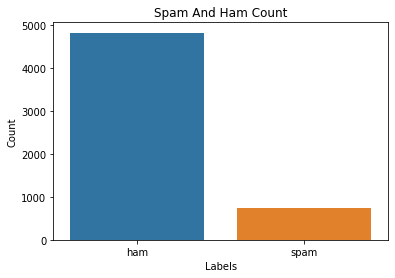

In [23]:
sns.countplot(data["label"])
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Spam And Ham Count")

In [24]:
data['spam']=data['label'].map({'spam':1,'ham':0}).astype(int)

In [25]:
data.head(10)

,label,sms,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [26]:
#Adding the new feature to the dataset
#and that is the length of the message
data['length']=data['sms'].apply(len)

In [27]:
data.head(10)

,label,sms,spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
6,ham,Even my brother is not like to speak with me. ...,0,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0,160
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa6ecc8ed50>,
      dtype=object)

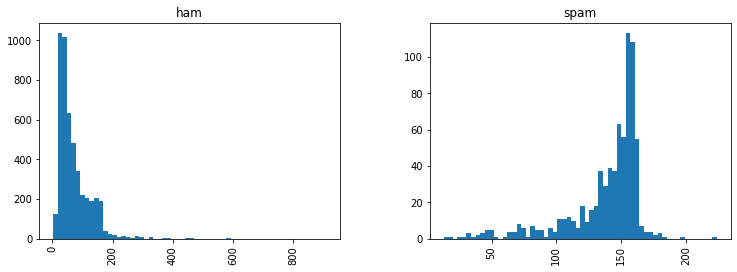

In [28]:
data.hist(column='length',by='label',bins=60,figsize=(12,4))

In [29]:
#very important insights that we are seeing usin the distribution plot is that the length of spam messages are generally longer than the 
#ham messages most of the ham messages having length less than 100 or most of the ham messages have the length greatr than 100

In [30]:
data_spam=data[data['spam']== 1].copy()
data_ham =data[data['spam']== 0].copy()

In [31]:
def show_wordcloud(data_spam_or_ham, title):
    text = ' '.join(data_spam_or_ham['sms'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()

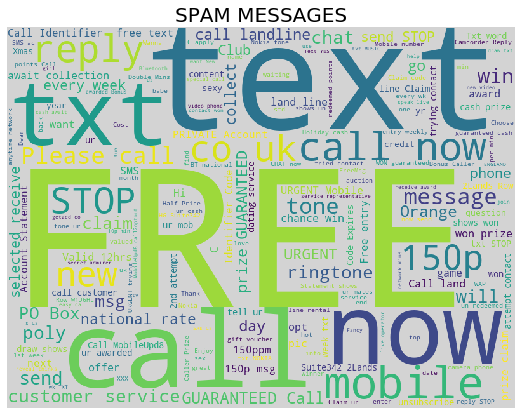

In [32]:
show_wordcloud(data_spam,"SPAM MESSAGES")

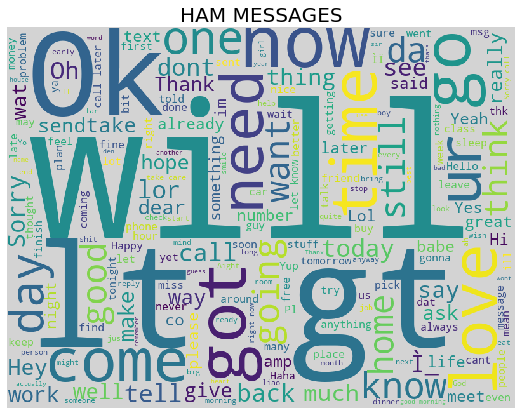

In [33]:
show_wordcloud(data_ham,"HAM MESSAGES")

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")[100:120]

[nltk_data] Downloading package stopwords to /home/tarun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'no',
 'nor',
 'not',
 'only']

In [36]:
def remove_punctuation_and_stopwords(sms):
    
    sms_no_punctuation = [ch for ch in sms if ch not in string.punctuation]
    sms_no_punctuation = "".join(sms_no_punctuation).split()
    
    sms_no_punctuation_no_stopwords =[word.lower() for word in sms_no_punctuation if word.lower() not in stopwords.words("english")]
        
    return sms_no_punctuation_no_stopwords

In [37]:
data['sms'].apply(remove_punctuation_and_stopwords)[0]

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat']

In [38]:
from collections import Counter

In [39]:
data_ham.loc[:, 'sms'] = data_ham['sms'].apply(remove_punctuation_and_stopwords)
words_data_ham = data_ham['sms'].tolist()
data_spam.loc[:, 'sms'] = data_spam['sms'].apply(remove_punctuation_and_stopwords)
words_data_spam = data_spam['sms'].tolist()

In [40]:
words_data_ham

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'u', 'oni'],
 ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'],
 ['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'callers',
  'press',
  '9',
  'copy',
  'friends',
  'callertune'],
 ['im',
  'gonna',
  'home',
  'soon',
  'dont',
  'want',
  'talk',
  'stuff',
  'anymore',
  'tonight',
  'k',
  'ive',
  'cried',
  'enough',
  'today'],
 ['ive',
  'searching',
  'right',
  'words',
  'thank',
  'breather',
  'promise',
  'wont',
  'take',
  'help',
  'granted',
  'fulfil',
  'promise',
  'wonderful',
  'blessing',
  'times'],
 ['date', 'sunday'],
 ['oh', 'kim',

In [41]:
words_data_spam

[['free',
  'entry',
  '2',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  '21st',
  'may',
  '2005',
  'text',
  'fa',
  '87121',
  'receive',
  'entry',
  'questionstd',
  'txt',
  'ratetcs',
  'apply',
  '08452810075over18s'],
 ['freemsg',
  'hey',
  'darling',
  '3',
  'weeks',
  'word',
  'back',
  'id',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'å£150',
  'rcv'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
  'å£900',
  'prize',
  'reward',
  'claim',
  'call',
  '09061701461',
  'claim',
  'code',
  'kl341',
  'valid',
  '12',
  'hours'],
 ['mobile',
  '11',
  'months',
  'u',
  'r',
  'entitled',
  'update',
  'latest',
  'colour',
  'mobiles',
  'camera',
  'free',
  'call',
  'mobile',
  'update',
  'co',
  'free',
  '08002986030'],
 ['six',
  'chances',
  'win',
  'cash',
  '100',
  '20000',
  'pounds',
  'txt',
  'csh11',
  'send',
  '87575',
  'cost',
  '150pday',
  '6days',

In [42]:
list_ham_words=[]
for sublist in words_data_ham:
    for item in sublist:
        list_ham_words.append(item)

In [43]:
list_spam_words=[]
for sublist in words_data_spam:
    for item in sublist:
        list_spam_words.append(item)

In [44]:
#Counter counts the frequency 
c_ham  = Counter(list_ham_words)
c_spam = Counter(list_spam_words)

In [45]:
print(c_ham,c_spam)

Counter({'u': 972, 'im': 449, '2': 305, 'get': 303, 'ltgt': 276, 'ok': 272, 'dont': 257, 'go': 247, 'ur': 240, 'ill': 236, 'know': 232, 'got': 231, 'like': 229, 'call': 229, 'come': 224, 'good': 222, 'time': 189, 'day': 187, 'love': 185, '4': 168, 'going': 167, 'want': 163, 'one': 162, 'home': 160, 'lor': 160, 'need': 156, 'sorry': 153, 'still': 146, 'see': 137, 'n': 134, 'later': 134, 'da': 131, 'r': 131, 'back': 129, 'think': 128, 'well': 126, 'today': 125, 'send': 123, 'tell': 121, 'cant': 118, 'ì': 117, 'hi': 117, 'take': 112, 'much': 112, 'oh': 111, 'night': 107, 'hey': 106, 'happy': 105, 'great': 100, 'way': 100, 'hope': 99, 'pls': 98, 'work': 96, 'wat': 95, 'thats': 94, 'dear': 94, 'give': 92, 'say': 91, 'already': 89, 'right': 89, 'make': 88, 'ask': 88, 'said': 86, 'really': 85, 'yeah': 85, 'amp': 82, 'tomorrow': 80, 'phone': 80, 'didnt': 79, 'e': 78, 'morning': 77, 'please': 76, 'cos': 76, 'life': 74, 'ive': 73, 'lol': 73, 'anything': 73, 'meet': 72, 'would': 72, 'k': 71, 'yes

In [46]:
df_hamwords_top30  = pd.DataFrame(c_ham.most_common(30),  columns=['word', 'count'])
df_spamwords_top30 = pd.DataFrame(c_spam.most_common(30), columns=['word', 'count'])

In [47]:
#c_ham.most_common(30) it gives you the most occured tuple 
#Remeber these function very very impotant

In [48]:
#Now df_hamwords_top30 is the data frame
#df_spamwords_top30 is also the dataframe

In [49]:
df_hamwords_top30.head()

,word,count
0,u,972
1,im,449
2,2,305
3,get,303
4,ltgt,276


In [50]:
df_spamwords_top30.head()

,word,count
0,call,347
1,free,216
2,2,173
3,txt,150
4,u,147


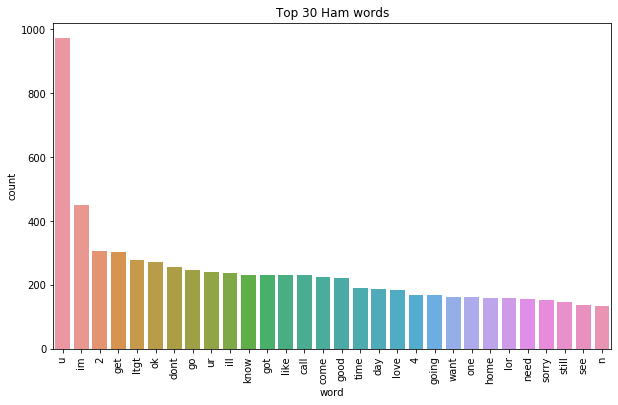

In [51]:
#plotting the barplot of top_30HamWords words count
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_hamwords_top30, ax=ax)
plt.title("Top 30 Ham words")
plt.xticks(rotation='vertical');

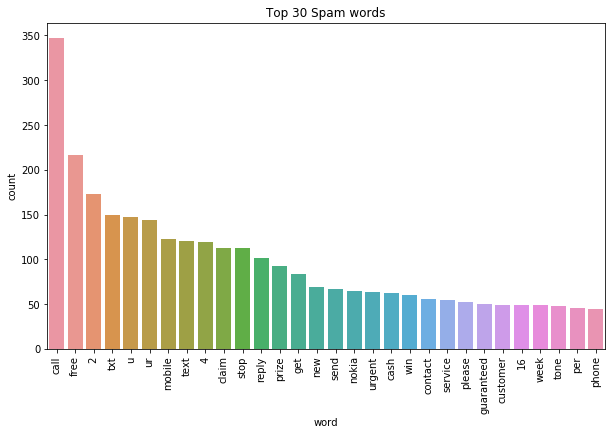

In [52]:
#plotting the barplot of top_30 spamwords count
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=df_spamwords_top30, ax=ax)
plt.title("Top 30 Spam words")
plt.xticks(rotation='vertical');

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = remove_punctuation_and_stopwords).fit(data['sms'])

In [54]:
print(len(bow_transformer.vocabulary_))

9431


In [55]:
bow_transformer.vocabulary_

{'go': 3748,
 'jurong': 4644,
 'point': 6376,
 'crazy': 2463,
 'available': 1375,
 'bugis': 1840,
 'n': 5624,
 'great': 3845,
 'world': 9107,
 'la': 4803,
 'e': 2988,
 'buffet': 1838,
 'cine': 2178,
 'got': 3805,
 'amore': 1142,
 'wat': 8870,
 'ok': 5940,
 'lar': 4842,
 'joking': 4612,
 'wif': 9003,
 'u': 8534,
 'oni': 5972,
 'free': 3539,
 'entry': 3123,
 '2': 415,
 'wkly': 9059,
 'comp': 2294,
 'win': 9017,
 'fa': 3261,
 'cup': 2518,
 'final': 3385,
 'tkts': 8311,
 '21st': 435,
 'may': 5287,
 '2005': 422,
 'text': 8150,
 '87121': 838,
 'receive': 6774,
 'questionstd': 6665,
 'txt': 8518,
 'ratetcs': 6718,
 'apply': 1228,
 '08452810075over18s': 72,
 'dun': 2974,
 'say': 7129,
 'early': 2995,
 'hor': 4175,
 'c': 1889,
 'already': 1116,
 'nah': 5631,
 'dont': 2882,
 'think': 8224,
 'goes': 3762,
 'usf': 8664,
 'lives': 5004,
 'around': 1279,
 'though': 8243,
 'freemsg': 3547,
 'hey': 4071,
 'darling': 2582,
 '3': 520,
 'weeks': 8923,
 'word': 9093,
 'back': 1426,
 'id': 4294,
 'like': 4

In [56]:
sample_spam=data['sms'][8]

In [57]:
bow_sample_spam=bow_transformer.transform([sample_spam])
print(sample_spam)
print(bow_sample_spam)

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
  (0, 218)	1
  (0, 323)	1
  (0, 1906)	1
  (0, 2184)	2
  (0, 2245)	1
  (0, 2531)	1
  (0, 4194)	1
  (0, 4759)	1
  (0, 5707)	1
  (0, 6538)	1
  (0, 6775)	1
  (0, 6946)	1
  (0, 7209)	1
  (0, 8694)	1
  (0, 8698)	1
  (0, 9028)	1
  (0, 9418)	1


In [58]:
rows, cols = bow_sample_spam.nonzero()
print(rows,cols)
for col in cols: 
  print(bow_transformer.get_feature_names()[col])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] [ 218  323 1906 2184 2245 2531 4194 4759 5707 6538 6775 6946 7209 8694
 8698 9028 9418]
09061701461
12
call
claim
code
customer
hours
kl341
network
prize
receivea
reward
selected
valid
valued
winner
å£900


In [59]:
print(np.shape(bow_sample_spam))

(1, 9431)


In [60]:
sample_ham=data['sms'][4]
bow_sample_ham=bow_transformer.transform([sample_ham])
print(sample_ham)
print(bow_sample_ham)

Nah I don't think he goes to usf, he lives around here though
  (0, 1279)	1
  (0, 2882)	1
  (0, 3762)	1
  (0, 5004)	1
  (0, 5631)	1
  (0, 8224)	1
  (0, 8243)	1
  (0, 8664)	1


In [61]:
rows,cols=bow_sample_ham.nonzero()
print(rows,cols)

[0 0 0 0 0 0 0 0] [1279 2882 3762 5004 5631 8224 8243 8664]


In [62]:
rows,cols=bow_sample_ham.nonzero()
for col in cols:
    print(bow_transformer.get_feature_names()[col])

around
dont
goes
lives
nah
think
though
usf


In [63]:
bow_data=bow_transformer.transform(data['sms'])
bow_data

<5572x9431 sparse matrix of type '<class 'numpy.int64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [64]:
bow_data.shape

(5572, 9431)

In [65]:
data.shape#Okk report upto here

(5572, 4)

In [66]:
bow_data.nnz #Number of Nonzero values 

49772

In [67]:
'''Occurrence count is a good start but there is an issue: longer documents will have higher average count values
than shorter documents, even though they might talk about the same topics.
To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document
by the total number of words in the document: these new features are called tf for Term Frequencies.
Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are
therefore less informative than those that occur only in a smaller portion of the corpus.
This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”'''

'Occurrence count is a good start but there is an issue: longer documents will have higher average count values\nthan shorter documents, even though they might talk about the same topics.\nTo avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document\nby the total number of words in the document: these new features are called tf for Term Frequencies.\nAnother refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are\ntherefore less informative than those that occur only in a smaller portion of the corpus.\nThis downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”'

In [68]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer().fit(bow_data)

In [69]:
tfidf_sample_ham = tfidf_transformer.transform(bow_sample_ham)
print(tfidf_sample_ham)

  (0, 8664)	0.4000611457714059
  (0, 8243)	0.35462891367407595
  (0, 8224)	0.2665748147939407
  (0, 5631)	0.40493594386802356
  (0, 5004)	0.44910913790937335
  (0, 3762)	0.35674330934716636
  (0, 2882)	0.23016324066220836
  (0, 1279)	0.31179198007951625


In [70]:
tfidf_sample_spam = tfidf_transformer.transform(bow_sample_spam)
print(tfidf_sample_spam)

  (0, 9418)	0.2604683359422661
  (0, 9028)	0.23445094204464131
  (0, 8698)	0.24115248419490207
  (0, 8694)	0.22254833340975305
  (0, 7209)	0.2148462495005997
  (0, 6946)	0.2564029044370425
  (0, 6775)	0.2943229069695555
  (0, 6538)	0.178899142428953
  (0, 5707)	0.2148462495005997
  (0, 4759)	0.2943229069695555
  (0, 4194)	0.22555164191980467
  (0, 2531)	0.1915015107445745
  (0, 2245)	0.21371446699888028
  (0, 2184)	0.3406301232141347
  (0, 1906)	0.1153380143353214
  (0, 323)	0.2387711073538672
  (0, 218)	0.2943229069695555


In [71]:
data_tfidf = tfidf_transformer.transform(bow_data)
data_tfidf

<5572x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 49772 stored elements in Compressed Sparse Row format>

In [72]:
data_tfidf.shape

(5572, 9431)

In [73]:
#For Tfidf Matrix only

In [74]:
from sklearn.model_selection import train_test_split
tfidf_train,tfidf_test,label_train,label_test=train_test_split(data_tfidf,data["spam"],test_size=0.3,random_state=0)

In [75]:
tfidf_train

<3900x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 34810 stored elements in Compressed Sparse Row format>

In [76]:
tfidf_test

<1672x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 14962 stored elements in Compressed Sparse Row format>

In [77]:
from scipy.sparse import  hstack
X2 = hstack((data_tfidf ,np.array(data['length'])[:,None])).A
X2

array([[  0.,   0.,   0., ...,   0.,   0., 111.],
       [  0.,   0.,   0., ...,   0.,   0.,  29.],
       [  0.,   0.,   0., ...,   0.,   0., 155.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,  57.],
       [  0.,   0.,   0., ...,   0.,   0., 125.],
       [  0.,   0.,   0., ...,   0.,   0.,  26.]])

In [78]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, data["spam"], test_size=0.3, random_state=5)

In [79]:
#sparse matrix to matrix

In [80]:
tfidf_train #= data_tfidf_train.A
tfidf_test #= data_tfidf_test.

<1672x9431 sparse matrix of type '<class 'numpy.float64'>'
	with 14962 stored elements in Compressed Sparse Row format>

In [81]:
data_tfidf_train = tfidf_train.A
data_tfidf_test = tfidf_test.A

In [82]:
classifier=MultinomialNB()
classifier.fit(data_tfidf_train,label_train)
y_pred=classifier.predict(data_tfidf_test)
acc_MNB=accuracy_score(label_test,y_pred)
print(acc_MNB)

0.9485645933014354


In [83]:
#Now we have to do the feature scaling

In [84]:
scaler = MinMaxScaler()
data_tfidf_train_sc = scaler.fit_transform(data_tfidf_train)
data_tfidf_test_sc  = scaler.transform(data_tfidf_test)

In [85]:
classifier=MultinomialNB()
classifier.fit(data_tfidf_train_sc,label_train)
y_pred=classifier.predict(data_tfidf_test_sc)
acc_MNB=accuracy_score(label_test,y_pred)
print(acc_MNB)

0.9754784688995215


In [86]:
#Tfidf Matrix with feature Unscaled

In [87]:
classifier_2 = MultinomialNB().fit(X2_train, y2_train)
y_pred_2 = classifier_2.predict(X2_test)
acc_MNB_2 = accuracy_score(y2_test, y_pred_2)
print(acc_MNB_2)

0.8761961722488039


In [88]:
#Now Scaling can be done to improve the performance
X2_tfidf_train = X2_train[:,0:9431]
X2_tfidf_test  = X2_test[:,0:9431]
X2_length_train = X2_train[:,9431]
X2_length_test  = X2_test[:,9431]

In [89]:
scaler=MinMaxScaler()
X2_tfidf_train = scaler.fit_transform(X2_tfidf_train)
X2_tfidf_test  = scaler.transform(X2_tfidf_test)

In [90]:
scaler = MinMaxScaler()
X2_length_train = scaler.fit_transform(X2_length_train.reshape(-1, 1))
X2_length_test  = scaler.transform(X2_length_test.reshape(-1, 1))

In [91]:
#Attached at the end
X2_train = np.hstack((X2_tfidf_train, X2_length_train))
X2_test  = np.hstack((X2_tfidf_test,  X2_length_test))

In [92]:
classifier_2_scaled=MultinomialNB().fit(X2_train,y2_train)
y_pred_2_scaled=classifier_2_scaled.predict(X2_test)
acc_MNB_Scaled=accuracy_score(y2_test,y_pred_2_scaled)
print(acc_MNB_Scaled)

0.9826555023923444


In [93]:
#We achieved the very good Accuracy by using the scaled attribute
#Using multinomialNB And Scaled attribute

In [94]:
parameters_KNN={'n_neighbors':(10,15,17),}
grid_KNN=GridSearchCV(KNeighborsClassifier(),parameters_KNN,cv=5,n_jobs=-1,verbose=1)
grid_KNN.fit(data_tfidf_train,label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  4.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': (10, 15, 17)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=1)

In [95]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

{'n_neighbors': 15}
0.9287179487179487


In [96]:
parameters_KNN = {'n_neighbors': (6,8,10), }
grid_KNN = GridSearchCV( KNeighborsClassifier(), parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)
grid_KNN.fit(data_tfidf_train_sc, label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  5.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': (6, 8, 10)}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=1)

In [97]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

{'n_neighbors': 6}
0.8817948717948717


In [98]:
#No i think the last parameters are fine

In [99]:
from sklearn.model_selection import train_test_split
sms_train, sms_test, label_train, label_test = train_test_split(data["sms"], data["spam"], test_size=0.3, random_state=5)

In [100]:
sms_train.head()

3507    Camera quite good, 10.1mega pixels, 3optical a...
1332            It's ok lar. U sleep early too... Nite...
4259        Are you plans with your family set in stone ?
1236                             How much are we getting?
2132    Your B4U voucher w/c 27/03 is MARSMS. Log onto...
Name: sms, dtype: object

In [101]:
pipe_MNB = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_MNB' , MultinomialNB()),
                    ])

In [102]:
pipe_MNB.fit(X=sms_train, y=label_train)
pred_test_MNB = pipe_MNB.predict(sms_test)
acc_MNB = accuracy_score(label_test, pred_test_MNB)
print(acc_MNB)
print(pipe_MNB.score(sms_test, label_test))

0.9665071770334929
0.9665071770334929


In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [104]:
pipe_MNB_tfidfvec = Pipeline([ ('tfidf_vec' , TfidfVectorizer(analyzer = remove_punctuation_and_stopwords)),
                               ('clf_MNB'   , MultinomialNB()),
                            ])

In [105]:
pipe_MNB_tfidfvec.fit(X=sms_train, y=label_train)
pred_test_MNB_tfidfvec = pipe_MNB_tfidfvec.predict(sms_test)
acc_MNB_tfidfvec = accuracy_score(label_test, pred_test_MNB_tfidfvec)
print(acc_MNB_tfidfvec)
print(pipe_MNB_tfidfvec.score(sms_test, label_test))

0.9665071770334929
0.9665071770334929


In [106]:
pipe_KNN = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_KNN' , KNeighborsClassifier() )
                    ])

parameters_KNN = {'clf_KNN__n_neighbors': (8,15,20), }

grid_KNN = GridSearchCV(pipe_KNN, parameters_KNN, cv=5,
                        n_jobs=-1, verbose=1)

grid_KNN.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7fa6ec6383b0>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
      

In [107]:
print(grid_KNN.best_params_)
print(grid_KNN.best_score_)

{'clf_KNN__n_neighbors': 15}
0.936923076923077


In [108]:
pred_test_grid_KNN = grid_KNN.predict(sms_test)
acc_KNN = accuracy_score(label_test, pred_test_grid_KNN)
print(acc_KNN)
print(grid_KNN.score(sms_test, label_test))

0.9515550239234449
0.9515550239234449


In [109]:
pipe_SVC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SVC' , SVC(gamma='auto', C=1000)),
                    ])


parameters_SVC = dict(tfidf=[None, TfidfTransformer()],
                      clf_SVC__C=[500, 1000,1500]
                      )
#parameters = {'tfidf__use_idf': (True, False),    }

grid_SVC = GridSearchCV(pipe_SVC, parameters_SVC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_SVC.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7fa6ec6383b0>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
      

In [110]:
print(grid_SVC.best_params_)
print(grid_SVC.best_score_)

{'clf_SVC__C': 1500, 'tfidf': None}
0.976153846153846


In [111]:
pred_test_grid_SVC = grid_SVC.predict(sms_test)
acc_SVC = accuracy_score(label_test, pred_test_grid_SVC)
print(acc_SVC)
print(grid_SVC.score(sms_test, label_test))

0.9838516746411483
0.9838516746411483


In [112]:
'''Pipeline with GridSearch
search best preprocessing: use_idf (yes/no)
and best model parameters (alpha, penalty)'''

'Pipeline with GridSearch\nsearch best preprocessing: use_idf (yes/no)\nand best model parameters (alpha, penalty)'

In [113]:
pipe_SGD = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                   ('tfidf'   , TfidfTransformer()),
                   ('clf_SGD' , SGDClassifier(random_state=5)),
                    ])

parameters_SGD = {
    #'vect__ngram_range': ((1, 1), (1, 2)),  # unigrams or bigrams
    'tfidf__use_idf': (True, False),
    #'tfidf__norm': ('l1', 'l2'),
    #'clf_SGD__max_iter': (5,10),
    'clf_SGD__alpha': (1e-05, 1e-04),
}

grid_SGD = GridSearchCV(pipe_SGD, parameters_SGD, cv=5,
                               n_jobs=-1, verbose=1)

grid_SGD.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7fa6ec6383b0>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
      

In [114]:
print(grid_SGD.best_params_)

{'clf_SGD__alpha': 0.0001, 'tfidf__use_idf': True}


In [115]:
print(grid_SGD.best_score_)

0.9766666666666666


In [116]:
pred_test_grid_SGD = grid_SGD.predict(sms_test)
acc_SGD = accuracy_score(label_test, pred_test_grid_SGD)
print(acc_SGD)
print(grid_SGD.score(sms_test, label_test))

0.9880382775119617
0.9880382775119617


In [117]:
'''GradientBoostingClassifier'''

'GradientBoostingClassifier'

In [118]:
pipe_GBC = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_GBC' , GradientBoostingClassifier(random_state=5) ),
                    ])

parameters_GBC = { 'tfidf__use_idf': (True, False), 
                   'clf_GBC__learning_rate': (0.1, 0.2),
                   #'clf_GBC__min_samples_split': (3,5), 
                 }

grid_GBC = GridSearchCV(pipe_GBC, parameters_GBC, 
                        cv=5, n_jobs=-1, verbose=1)

grid_GBC.fit(X=sms_train, y=label_train)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7fa6ec6383b0>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
      

In [119]:
print(grid_GBC.best_params_)

{'clf_GBC__learning_rate': 0.2, 'tfidf__use_idf': False}


In [120]:
print(grid_GBC.best_score_)

0.964102564102564


In [121]:
pred_test_grid_GBC = grid_GBC.predict(sms_test)
acc_GBC = accuracy_score(label_test, pred_test_grid_GBC)
print(acc_GBC)
print(grid_GBC.score(sms_test, label_test))

0.9736842105263158
0.9736842105263158


In [123]:
import xgboost as xgb

In [124]:
pipe_XGB = Pipeline([ ('bow'  , CountVectorizer(analyzer = remove_punctuation_and_stopwords) ),
                      ('tfidf'   , TfidfTransformer() ),
                      ('clf_XGB' , xgb.XGBClassifier(random_state=5) ),
                    ])

parameters_XGB = { 'tfidf__use_idf': (True, False), 
                   'clf_XGB__eta': (0.01, 0.02),
                   'clf_XGB__max_depth': (5,6), 
                 }

grid_XGB = GridSearchCV(pipe_XGB, parameters_XGB, 
                        cv=5, n_jobs=-1, verbose=1)

grid_XGB.fit(X=sms_train, y=label_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  3.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('bow',
                                        CountVectorizer(analyzer=<function remove_punctuation_and_stopwords at 0x7fa6ec6383b0>,
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
      

In [125]:
grid_XGB.best_params_

{'clf_XGB__eta': 0.01, 'clf_XGB__max_depth': 5, 'tfidf__use_idf': False}

In [126]:
grid_XGB.best_score_

0.9589743589743589

In [127]:
pred_test_grid_XGB = grid_XGB.predict(sms_test)
acc_XGB = accuracy_score(label_test, pred_test_grid_XGB)
print(acc_XGB)
print(grid_XGB.score(sms_test, label_test))

0.9736842105263158
0.9736842105263158


In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

In [129]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    #fig, ax = plt.subplots(figsize=(4,4))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  
                cmap="Blues", square=True, cbar=False)
    #  
    plt.ylabel('true label')
    plt.xlabel('predicted label')


In [130]:
list_clf = ["MNB", "KNN", "SVC", "SGD", "GBC", "XGB"]

list_pred = [y_pred, pred_test_grid_KNN, 
             pred_test_grid_SVC, pred_test_grid_SGD,
             pred_test_grid_GBC, pred_test_grid_XGB]

dict_pred = dict(zip(list_clf, list_pred))

In [164]:
def plot_all_confusion_matrices(y_true, dict_all_pred, str_title):
    
    list_classifiers = list(dict_all_pred.keys())
    plt.figure(figsize=(10,7.5))
    plt.suptitle(str_title, fontsize=20, fontweight='bold')
    n=231
    for clf in list_classifiers : 
        plt.subplot(n)
        #plot_confusion_matrix(y_true, dict_all_pred[clf])
        cm=confusion_matrix(y_true,dict_all_pred[clf])
        ax=sns.heatmap(cm,annot=True,cmap='Greens')
        bottom,top=ax.get_ylim()
        ax.set_ylim(bottom+0.5,top-0.5)
        plt.title(clf, fontweight='bold')
        n+=1
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    

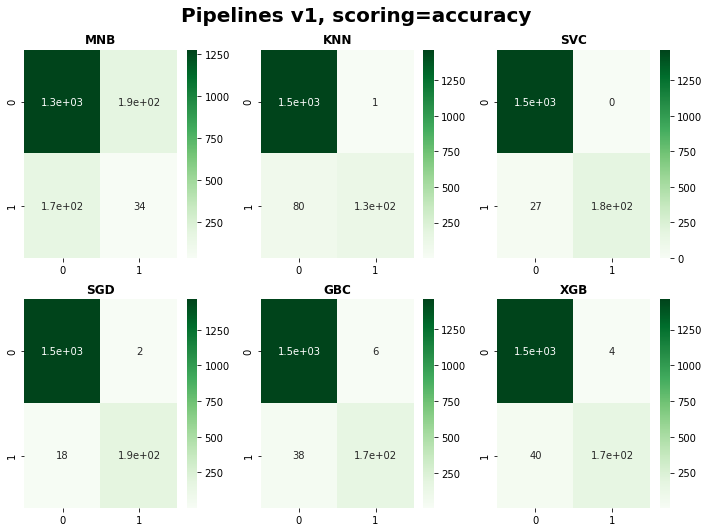

In [165]:
plot_all_confusion_matrices(label_test, dict_pred, "Pipelines v1, scoring=accuracy")

In [133]:
dict_acc = {}
for clf in list_clf :
    dict_acc[clf] = accuracy_score(label_test, dict_pred[clf])

In [134]:
for clf in list_clf :
    print(clf, " " , dict_acc[clf])

MNB   0.7834928229665071
KNN   0.9515550239234449
SVC   0.9838516746411483
SGD   0.9880382775119617
GBC   0.9736842105263158
XGB   0.9736842105263158


In [135]:
for clf in list_clf :
    print(clf, " ", precision_score(label_test, dict_pred[clf]))

MNB   0.15246636771300448
KNN   0.9921875
SVC   1.0
SGD   0.9895287958115183
GBC   0.9657142857142857
XGB   0.9766081871345029


In [136]:
for clf in list_clf :
    print(clf, " ", precision_score(label_test, dict_pred[clf], average=None, labels=[0,1]))

MNB   [0.88060732 0.15246637]
KNN   [0.94818653 0.9921875 ]
SVC   [0.98190349 1.        ]
SGD   [0.98784605 0.9895288 ]
GBC   [0.9746159  0.96571429]
XGB   [0.9733511  0.97660819]


In [137]:
for clf in list_clf :
    print(clf, " ", recall_score(label_test, dict_pred[clf]))


MNB   0.1642512077294686
KNN   0.6135265700483091
SVC   0.8695652173913043
SGD   0.9130434782608695
GBC   0.8164251207729468
XGB   0.8067632850241546


In [138]:
for clf in list_clf :
    print(clf, " ", recall_score(label_test, dict_pred[clf], average=None, labels=[0,1] ))

MNB   [0.87098976 0.16425121]
KNN   [0.99931741 0.61352657]
SVC   [1.         0.86956522]
SGD   [0.99863481 0.91304348]
GBC   [0.99590444 0.81642512]
XGB   [0.99726962 0.80676329]


In [139]:
print(classification_report(label_test, pred_test_MNB))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1465
           1       1.00      0.73      0.84       207

    accuracy                           0.97      1672
   macro avg       0.98      0.86      0.91      1672
weighted avg       0.97      0.97      0.96      1672



In [140]:
for clf in list_clf :
    print(clf, " ", roc_auc_score(label_test, dict_pred[clf] ))

MNB   0.5176204844108094
KNN   0.806421988095827
SVC   0.9347826086956521
SGD   0.9558391452737794
GBC   0.9061647788165076
XGB   0.9020164547987667


In [179]:
#Some Nltk approach

In [170]:
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/tarun/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [171]:
print(data['sms'][7])

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


In [172]:
print(word_tokenize(data['sms'][7]))

['As', 'per', 'your', 'request', "'Melle", 'Melle', '(', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', ')', "'", 'has', 'been', 'set', 'as', 'your', 'callertune', 'for', 'all', 'Callers', '.', 'Press', '*9', 'to', 'copy', 'your', 'friends', 'Callertune']


In [174]:
stopWords = set(stopwords.words('english'))
words = word_tokenize(data['sms'][7])
wordsFiltered = []

for w in words:
    if w not in stopWords:
        wordsFiltered.append(w)

print(wordsFiltered)

['As', 'per', 'request', "'Melle", 'Melle', '(', 'Oru', 'Minnaminunginte', 'Nurungu', 'Vettam', ')', "'", 'set', 'callertune', 'Callers', '.', 'Press', '*9', 'copy', 'friends', 'Callertune']
